In [28]:
# Importing needed packages
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.ops import polygonize
from shapely.geometry import MultiLineString
import numpy as np
from geopandas.tools import sjoin
import matplotlib.pyplot as plt





In [115]:
data = pd.read_csv("CleanedData/CLEANED_LouisaVirginiaMagnetics.csv")
data = data.iloc[:,1:]
data.columns = ["X","Y","Val"]

geo_data = gpd.GeoDataFrame(data,geometry=gpd.points_from_xy(data.X, data.Y)) #convert df to geodataframe

In [132]:
 #grid size -> 8 grids - spaning from lowest x/y to highest x/y
gridx = np.linspace(min(data.X),max(data.X),10)
gridy = np.linspace(min(data.Y),max(data.Y),10)

#Create horizontal and vertical lines
hlines = [((x1, yi), (x2, yi)) for x1, x2 in list(zip(gridx[:-1], gridx[1:])) for yi in gridy]
vlines = [((xi, y1), (xi, y2)) for y1, y2 in zip(gridy[:-1], gridy[1:]) for xi in gridx]


polys = list(polygonize(MultiLineString(hlines + vlines))) # create polygons
id = [i for i in range(len(polys))] #polygon index
grid = gpd.GeoDataFrame({"id":id,"geometry":polys}) #Geodataframe of grid polygons

# count points in each polygon using a spatial join
pointInPolys = sjoin(geo_data, grid, how='left') #df of points and the polygon id of the polygon they are in
pointCount = pointInPolys.groupby(['id']).size().reset_index(name='ValCount')
print(pointCount.sort_values(by="ValCount", ascending = False))




    id  ValCount
34  43     19280
23  32     18915
33  42     17105
28  37     16885
20  29     16803
..  ..       ...
62  78       235
58  70       161
4   10       145
10  18        65
52  62        51

[63 rows x 2 columns]


0      Annotation(225177, 4.18484e+06, '0')
1      Annotation(225177, 4.18897e+06, '1')
2       Annotation(225177, 4.1931e+06, '2')
3      Annotation(225177, 4.19723e+06, '3')
4      Annotation(225177, 4.20137e+06, '4')
                      ...                  
76    Annotation(258184, 4.20137e+06, '76')
77     Annotation(258184, 4.2055e+06, '77')
78    Annotation(258184, 4.20963e+06, '78')
79    Annotation(258184, 4.21376e+06, '79')
80    Annotation(258184, 4.21789e+06, '80')
Length: 81, dtype: object

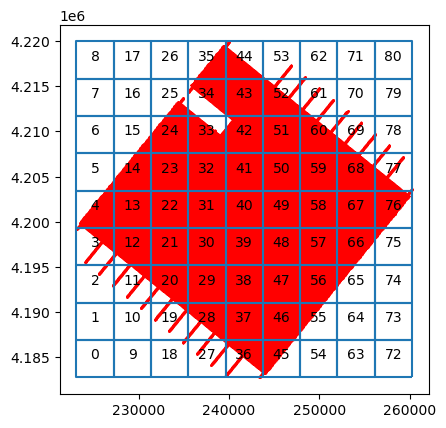

In [134]:
base = grid.boundary.plot() # plot grids as basemap
geo_data.plot(ax = base, color = 'r',markersize=0.1) #plot survey points
grid.apply(lambda x: base.annotate(text=x['id'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1) #add grid id label



,id,ValCount
count,63.000000,63.000000
mean,40.000000,10494.047619
std,20.858973,6722.085833
min,2.000000,51.000000
25%,23.500000,3135.500000
50%,40.000000,13433.000000
75%,56.500000,16561.000000
max,78.000000,19280.000000


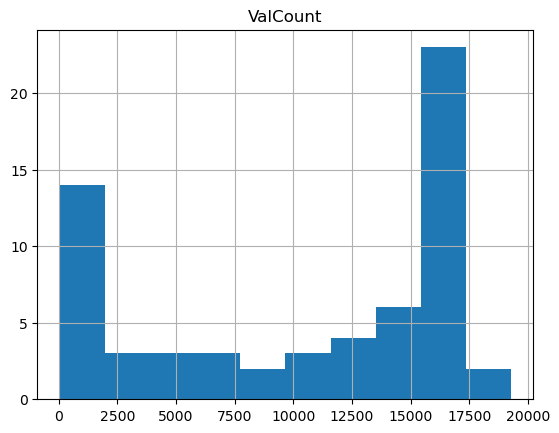

In [135]:
pointCount.hist(column = 'ValCount',bins=10)
pointCount.describe()

In [137]:
max(pointCount.ValCount)

19280

In [138]:
print(pointCount.sort_values(by="ValCount", ascending = False))

    id  ValCount
34  43     19280
23  32     18915
33  42     17105
28  37     16885
20  29     16803
..  ..       ...
62  78       235
58  70       161
4   10       145
10  18        65
52  62        51

[63 rows x 2 columns]
